# Storing the necessary libraries in requirements.txt



In [1]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib.pyplot
!pip install sklearn

!pip freeze > requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=8075031252d166001abe19df3254b52ed32e2f34ec3efb391031b83807586ac9
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built sklearn


## Importing libraries

In [2]:
import pandas as pd
import numpy as np

Reading data

In [8]:
data = pd.read_csv('/content/test.csv')
data.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 0:00:00,0.0
1,1,0,2016-01-01 0:00:00,0.0
2,2,0,2016-01-01 0:00:00,0.0
3,3,0,2016-01-01 0:00:00,0.0
4,4,0,2016-01-01 0:00:00,0.0


In [9]:
data.shape     # checking the size of dataset

(498513, 4)

In [35]:
data.info()     # checking the types of variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498513 entries, 0 to 498512
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   building_id    498513 non-null  int64  
 1   meter          498513 non-null  int64  
 2   timestamp      498513 non-null  object 
 3   meter_reading  498513 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 15.2+ MB


In [22]:
data['meter'].unique()

array([0, 3, 1, 2])

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 12))

<Figure size 1440x864 with 0 Axes>

<Figure size 1440x864 with 0 Axes>

In [34]:
building_id = pd.pivot_table(data = data, index = ['building_id'])
building_id.head()

,meter,meter_reading
building_id,,
0,0.0,0.000000
1,0.0,0.312027
2,0.0,0.018872
3,0.0,0.000000
4,0.0,0.000000


Converting timestamp object to datetime object

In [40]:
data['timestamp'] = pd.to_datetime(data['timestamp'], infer_datetime_format=True)
data.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01,0.0
1,1,0,2016-01-01,0.0
2,2,0,2016-01-01,0.0
3,3,0,2016-01-01,0.0
4,4,0,2016-01-01,0.0


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498513 entries, 0 to 498512
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   building_id    498513 non-null  int64         
 1   meter          498513 non-null  int64         
 2   timestamp      498513 non-null  datetime64[ns]
 3   meter_reading  498513 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 15.2 MB


Separating day, month, year and hour from timestamp

In [48]:
data['year'] = data['timestamp'].dt.year
data['month'] = data['timestamp'].dt.month
data['day'] = data['timestamp'].dt.day
data['hour'] = data['timestamp'].dt.hour
data_1 = data.drop(['timestamp'], axis = 1)
data_1.head()

,building_id,meter,meter_reading,year,month,day,hour
0,0,0,0.0,2016,1,1,0
1,1,0,0.0,2016,1,1,0
2,2,0,0.0,2016,1,1,0
3,3,0,0.0,2016,1,1,0
4,4,0,0.0,2016,1,1,0


Checking the unique values for day, month, year and hour

In [49]:
data_1['year'].unique(), data_1['month'].unique(), data_1['day'].unique(), data_1['hour'].unique()

(array([2016]),
 array([1]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]))

Since the data is for one month, we are diacarding the year and month column

In [50]:
data_1 = data_1.drop(['year', 'month'], axis = 1)
data_1.head()

,building_id,meter,meter_reading,day,hour
0,0,0,0.0,1,0
1,1,0,0.0,1,0
2,2,0,0.0,1,0
3,3,0,0.0,1,0
4,4,0,0.0,1,0


Storing descriptive statistics for each building in a dataset

In [53]:
data_1.drop(['meter'], axis = 1).groupby('building_id').describe().to_csv('Descriptive stats of different buildings.csv')

Storing descriptive statistics for each meter in a dataset

In [54]:
data_1.drop(['building_id'], axis = 1).groupby('meter').describe().to_csv('Descriptive stats of different meter.csv')

In [60]:
building_id = pd.pivot_table(data = data_1, index = ['building_id'])
building_id

,day,hour,meter,meter_reading
building_id,,,,
0,5.023041,11.447005,0.0,0.000000
1,5.023041,11.447005,0.0,0.312027
2,5.023041,11.447005,0.0,0.018872
3,5.023041,11.447005,0.0,0.000000
4,5.023041,11.447005,0.0,0.000000
...,...,...,...,...
1444,5.023041,11.447005,0.0,6.722926
1445,5.023041,11.447005,0.0,5.724654
1446,5.023041,11.447005,0.0,1.585138


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


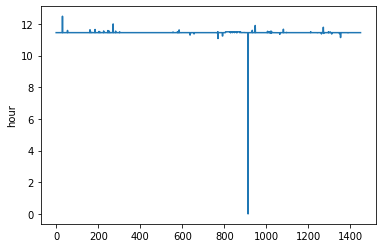

In [59]:
sns.lineplot(data_1['building_id'].unique(), building_id['hour'])

In [64]:
data_1.isna().sum()    # showing that there's no missing value

building_id      0
meter            0
meter_reading    0
day              0
hour             0
dtype: int64

Grouping by hour

In [77]:
hourly = data_1.groupby(['hour', 'meter', 'building_id']).sum().reset_index()
hourly.head()

,hour,meter,building_id,meter_reading,day
0,0,0,0,0.0,55
1,0,0,1,0.0,55
2,0,0,2,0.0,55
3,0,0,3,0.0,55
4,0,0,4,0.0,55


Plotiing to visualized the data

Text(0.5, 1.0, 'Meter reading for each hour')

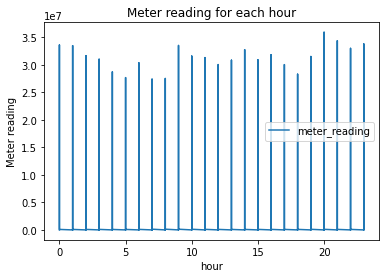

In [79]:
hourly.plot(x = 'hour', y = 'meter_reading')
plt.ylabel('Meter reading')
plt.title('Meter reading for each hour')

In [82]:
hourly.info()     # checking the data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55396 entries, 0 to 55395
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hour           55396 non-null  int64  
 1   meter          55396 non-null  int64  
 2   building_id    55396 non-null  int64  
 3   meter_reading  55396 non-null  float64
 4   day            55396 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 2.1 MB


In [84]:
hourly_edited = hourly.drop(['meter', 'building_id'], axis = 1)
hourly_edited

,hour,meter_reading,day
0,0,0.000,55
1,0,0.000,55
2,0,0.000,55
3,0,0.000,55
4,0,0.000,55
...,...,...,...
55391,23,19065.250,45
55392,23,15332.720,45
55393,23,548.174,45
55394,23,2425.274,45


In [85]:
hourly_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55396 entries, 0 to 55395
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hour           55396 non-null  int64  
 1   meter_reading  55396 non-null  float64
 2   day            55396 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 MB


{'whiskers': [<matplotlib.lines.Line2D at 0x7fef58a4aa90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fef58a5cd10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fef58a67a10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fef58ba3e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fef58a65250>],
 'means': []}

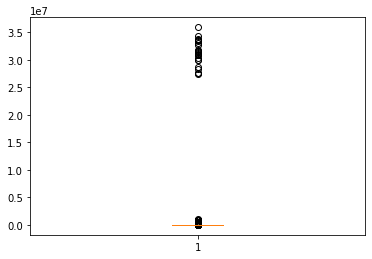

In [101]:
plt.boxplot(hourly_edited['meter_reading'])     # plotting boxplot for checking the outliers

In [97]:
data['meter_reading'].min(), data['meter_reading'].max()

(0.0, 8243400.0)

In [99]:
data.describe()

,building_id,meter,meter_reading,year,month,day,hour
count,498513.000000,498513.000000,4.985130e+05,498513.0,498513.0,498513.000000,498513.000000
mean,813.646820,0.657554,1.994749e+03,2016.0,1.0,5.022254,11.450081
std,426.419227,0.933705,9.220850e+04,0.0,0.0,2.597903,6.950242
min,0.000000,0.000000,0.000000e+00,2016.0,1.0,1.000000,0.000000
25%,414.000000,0.000000,1.210720e+01,2016.0,1.0,3.000000,5.000000
50%,907.000000,0.000000,6.197520e+01,2016.0,1.0,5.000000,11.000000
75%,1197.000000,1.000000,2.160000e+02,2016.0,1.0,7.000000,17.000000
max,1448.000000,3.000000,8.243400e+06,2016.0,1.0,10.000000,23.000000


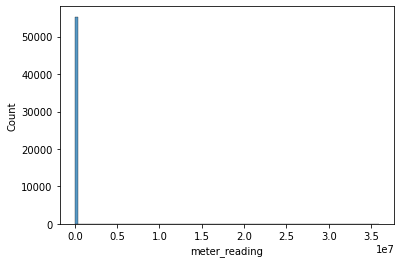

In [102]:
sns.histplot(hourly_edited['meter_reading'], bins=100)        #plotting histogram for checking distribution.